In [196]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [197]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Week 12 - R demo.mp4',
 'Week 12 - SAS demo.mp4',
 'week 12 exercise.ipynb',
 'Week 12 Learning Plan.html',
 'Week 12 Learning Plan.pdf',
 'Week 12 Learning Plan_files',
 'Week 12 Lecture - python.mp4',
 'Week 12 slides.pdf',
 'WongAKO-DHDS120-W12-PythonDemo.ipynb',
 'xtrfxcovbs_withbmd.sas7bdat']

In [198]:
data = pd.read_sas("xtrfxcovbs_withbmd.sas7bdat")
data.columns = data.columns.str.lower()
data.columns

Index(['replicate', 't_xtrdate', 'r_xtrdate', 'nonewosteofx_enddate',
       'nonewhipfx_enddate', 'qid', 't_fl_fea', 't_ctpo_ec', 't_ttar',
       't_ctar', 't_tbar', 't_ttbmd', 't_ctbmd', 't_ctth', 't_tbbmd', 't_tbn',
       't_tbth', 't_tbsp', 't_moart', 'r_fl_fea', 'r_ctpo_ec', 'r_ttar',
       'r_ctar', 'r_tbar', 'r_ttbmd', 'r_ctbmd', 'r_ctth', 'r_tbbmd', 'r_tbn',
       'r_tbth', 'r_tbsp', 'r_moart', 't_bvtv', 'r_bvtv', 'fnewopfxd',
       'fnewhipfxd', 'newosteofx', 'firstnewosteofx_site',
       'firstnewosteofx_year', 'firstnewosteofx_month', 'firstnewosteofx_day',
       'newosteofx_trauma', 'newhipfx', 'firstnewhipfx_year',
       'firstnewhipfx_month', 'firstnewhipfx_day', 'newhipfx_trauma',
       'nonewosteofx_enddispo', 'nonewhipfx_enddispo', 'age', 'height',
       'weight', 'centre', 'parenthipfx', 'prevfx_any', 'cig_cur',
       'nbalc_week', 'rheu_ever', 'cortico_oral_reg', 'secop', 'nbfall_pastyr',
       'everlost10lbs', 'osteomed', 'i', 'prev_backmt', 'prev_hipmt'

In [199]:
data.head()

,replicate,t_xtrdate,r_xtrdate,nonewosteofx_enddate,nonewhipfx_enddate,qid,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,...,status,r_ttop,t_ttop,r_tthip,t_tthip,numberhits,id,l14_16,neck_16,tothip_16
0,1.0,2012-02-29,2012-02-29,2015-02-08 00:00:00,2015-02-08 00:00:00,b'CA01508',5921.8,8.15,830.09093,116.72547,...,0.0,36.0,36.0,36.0,36.0,2.0,219.0,1.170590,0.831791,0.944238
1,1.0,2012-02-29,2012-02-29,2015-02-08 00:00:00,2015-02-08 00:00:00,b'CA01508',5921.8,8.15,830.09093,116.72547,...,0.0,36.0,36.0,36.0,36.0,2.0,220.0,1.170590,0.831791,0.944238
2,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.83,960.47070,72.70221,...,0.0,23.0,23.0,23.0,23.0,2.0,891.0,0.859351,0.778188,0.954228
3,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.83,960.47070,72.70221,...,0.0,23.0,23.0,23.0,23.0,2.0,892.0,0.859351,0.778188,0.954228
4,1.0,2012-03-13,2012-03-13,2015-01-27 00:00:00,2015-01-27 00:00:00,b'CA01545',6204.0,9.56,701.02992,99.59033,...,0.0,34.0,34.0,34.0,34.0,1.0,893.0,1.222938,0.851834,1.032604


In [200]:
data.describe()

,replicate,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,t_tbar,t_ttbmd,t_ctbmd,t_ctth,t_tbbmd,...,status,r_ttop,t_ttop,r_tthip,t_tthip,numberhits,id,l14_16,neck_16,tothip_16
count,1231.0,1196.000000,1199.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,...,1231.000000,1185.000000,1189.000000,1185.000000,1189.000000,1231.000000,1231.000000,1029.000000,1015.000000,1015.000000
mean,1.0,5383.988712,3.028795,686.022057,92.394473,581.372200,254.978326,773.763692,0.950364,158.390081,...,0.191714,36.205907,36.282590,37.903797,37.982338,2.756296,834.553209,0.998679,0.705895,0.851710
std,0.0,973.729253,4.896780,107.888330,25.454452,113.367475,52.810507,86.883444,0.287123,38.342168,...,0.499394,14.653595,14.729293,14.419366,14.477738,1.290644,356.105098,0.179075,0.115445,0.127472
min,1.0,2519.000000,0.021500,410.400000,0.000000,289.100000,11.600000,20.300000,0.000000,10.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,218.000000,0.554672,0.275064,0.405257
25%,1.0,4665.500000,0.075750,608.200000,77.617520,500.200000,217.900000,732.200000,0.770000,133.578400,...,0.000000,29.000000,29.000000,31.000000,31.000000,2.000000,527.500000,0.874187,0.630040,0.753133
50%,1.0,5308.600000,0.101400,681.710120,93.119995,580.413360,255.000000,777.000000,0.960000,157.743700,...,0.000000,34.000000,34.000000,34.000000,34.000000,3.000000,835.000000,0.982413,0.690406,0.849280
75%,1.0,5982.850000,6.450000,754.175000,108.800000,654.875000,286.700000,827.258300,1.122539,185.876500,...,0.000000,42.000000,43.000000,45.000000,45.000000,4.000000,1142.500000,1.091184,0.770702,0.932123
max,1.0,8463.000000,21.810000,1076.300000,162.704430,983.100000,418.900000,976.800000,1.830607,278.500000,...,2.000000,80.000000,80.000000,80.000000,80.000000,8.000000,1450.000000,1.857849,1.159085,1.295089


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   replicate               1231 non-null   float64       
 1   t_xtrdate               1189 non-null   datetime64[ns]
 2   r_xtrdate               1185 non-null   datetime64[ns]
 3   nonewosteofx_enddate    1231 non-null   object        
 4   nonewhipfx_enddate      1231 non-null   object        
 5   qid                     1231 non-null   object        
 6   t_fl_fea                1196 non-null   float64       
 7   t_ctpo_ec               1199 non-null   float64       
 8   t_ttar                  1194 non-null   float64       
 9   t_ctar                  1194 non-null   float64       
 10  t_tbar                  1194 non-null   float64       
 11  t_ttbmd                 1194 non-null   float64       
 12  t_ctbmd                 1194 non-null   float64 

In [202]:
#question 1
#find sd and mean of t_ctpo_ec and t_tbsp
t_ctpo_ec_mean = data.describe()['t_ctpo_ec']['mean']
t_ctpo_ec_std = data.describe()['t_ctpo_ec']['std']
t_tbsp_mean = data.describe()['t_tbsp']['mean']
t_tbsp_std = data.describe()['t_tbsp']['std']

In [203]:
#2.	Run a univariable linear regression between t_CtPo_EC and t_TbSp 
#a.	Report the regression coefficient, 95% CI, and R2. 

LRdf = data[['t_ctpo_ec', 't_tbsp']].dropna()
np.isnan(LRdf).value_counts()

t_ctpo_ec  t_tbsp
False      False     1192
dtype: int64

In [204]:
x = LRdf[['t_ctpo_ec']]
y = LRdf[['t_tbsp']]
x
x1 = sm.add_constant(x)
x1

,const,t_ctpo_ec
0,1.0,8.1500
1,1.0,8.1500
2,1.0,8.8300
3,1.0,8.8300
4,1.0,9.5600
...,...,...
1226,1.0,0.0768
1227,1.0,0.0768
1228,1.0,0.0833
1229,1.0,0.0833


In [205]:
#question 2
model = sm.OLS(y, x1) #create model
results = model.fit() #fit 

print(results.summary()) #get results 

                            OLS Regression Results                            
Dep. Variable:                 t_tbsp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.959
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0857
Time:                        22:31:04   Log-Likelihood:                 537.16
No. Observations:                1192   AIC:                            -1070.
Df Residuals:                    1190   BIC:                            -1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5226      0.005     99.323      0.0

In [206]:
#question 3

#re code t_ctpo_ec and t_tbsp to binomial

#If t_CtPo_EC >= mean of  t_CtPo_EC + 2* standard deviation of t_CtPo_EC then t_CtPo_bi = 1; Else t_CtPo_bi = 0 
data['t_ctpo_bi'] = data['t_ctpo_ec'].apply(lambda t_ctpo_ec: 1 if t_ctpo_ec >= (t_ctpo_ec_mean + (2*t_ctpo_ec_std)) else 0)

#If t_TbSp >= mean of  t_TbSp + 2* standard deviation of t_TbSp then t_TbSp_bi = 1; Else t_TbSp_bi = 0 
data['t_tbsp_bi'] = data['t_tbsp'].apply(lambda t_tbsp: 1 if t_tbsp >= (t_tbsp_mean + (2*t_tbsp_std)) else 0)

data.tail()



,replicate,t_xtrdate,r_xtrdate,nonewosteofx_enddate,nonewhipfx_enddate,qid,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,...,t_ttop,r_tthip,t_tthip,numberhits,id,l14_16,neck_16,tothip_16,t_ctpo_bi,t_tbsp_bi
1226,1.0,2013-12-12,2013-12-12,2016-07-12 00:00:00,2016-07-12 00:00:00,b'VR09553',4430.0,0.0768,770.5,37.2,...,31.0,31.0,31.0,2.0,1271.0,0.955628,0.553437,0.59292,0,0
1227,1.0,2013-12-12,2013-12-12,2016-07-12 00:00:00,2016-07-12 00:00:00,b'VR09553',4430.0,0.0768,770.5,37.2,...,31.0,31.0,31.0,2.0,1272.0,0.955628,0.553437,0.59292,0,0
1228,1.0,2013-12-05,2013-12-05,2015-07-15 00:00:00,2015-07-15 00:00:00,b'VR09856',4667.0,0.0833,992.5,22.8,...,19.0,19.0,19.0,3.0,888.0,1.259637,NaN,NaN,0,0
1229,1.0,2013-12-05,2013-12-05,2015-07-15 00:00:00,2015-07-15 00:00:00,b'VR09856',4667.0,0.0833,992.5,22.8,...,19.0,19.0,19.0,3.0,889.0,1.259637,NaN,NaN,0,0
1230,1.0,2013-12-05,2013-12-05,2015-07-15 00:00:00,2015-07-15 00:00:00,b'VR09856',4667.0,0.0833,992.5,22.8,...,19.0,19.0,19.0,3.0,890.0,1.259637,NaN,NaN,0,0


#part 2

In [207]:
# Packages for survival analysis
!pip install lifelines
from lifelines.statistics import multivariate_logrank_test
from lifelines import KaplanMeierFitter, CoxPHFitter

In [208]:
#Create time to event (TTE) and Status variables

# Make a copy of dataframe: 
xtrsurv =data.copy()

In [209]:
# Let's look at time from study visit to first new osteoporotic fracture

# study visit date is same as date when CT scan was done:  t_xtrdate
# new osteoporotic fracture date is split into:  'firstnewosteofx_year', 'firstnewosteofx_month', 'firstnewosteofx_day'
# study end date is nonewosteofx_enddate if they never had a fracture

xtrsurv['visitdate'] = pd.to_datetime(xtrsurv['t_xtrdate'], errors='ignore')
xtrsurv['enddate'] = pd.to_datetime(xtrsurv['nonewosteofx_enddate'], errors='coerce')

xtrsurv['year'] = xtrsurv['firstnewosteofx_year'].replace(-9999.0, np.NaN)
xtrsurv['month'] = xtrsurv['firstnewosteofx_month'].replace(-9999.0, np.NaN)
xtrsurv['day'] = xtrsurv['firstnewosteofx_day'].replace(-9999.0, np.NaN)

xtrsurv['newosteofxdate'] = pd.to_datetime(xtrsurv[['year','month', 'day']], errors='ignore')
del xtrsurv['year'], xtrsurv['month'], xtrsurv['day']


In [ ]:
xtrsurv['TTFx'] = round((xtrsurv['newosteofxdate']-xtrsurv['visitdate']).dt.days/30.30437,0)
xtrsurv['TTEnd'] = round((xtrsurv['enddate']-xtrsurv['visitdate']).dt.days/30.30437,0)

xtrsurv.loc[xtrsurv['newosteofx'] == 1, 'TTE'] = xtrsurv['TTFx']
xtrsurv.loc[xtrsurv['newosteofx'] == 0, 'TTE'] = xtrsurv['TTEnd']

xtrsurv['status'] = xtrsurv['newosteofx']
xtrsurv.head()

# Kaplan Meier Analysis using lifelines package

In [228]:
#question 1 1.	How does a larger cortical porosity (t_CtPo_bi) and a larger trabecular separation  (t_TbSp_bi) relate to 
# having new osteoporotic fractures (newosteofx) in the future?

# First, drop all rows with missing values for the variables you are looking at – 
#this isn’t automatically done in the linear regression procedure: 
kmpvfx = xtrsurv[["t_ctpo_bi", "t_tbsp_bi","newosteofx", 't_ttop', 'status']].dropna()

np.isnan(kmpvfx).value_counts()

t_ctpo_bi  t_tbsp_bi  newosteofx  t_ttop  status
False      False      False       False   False     1188
dtype: int64

<AxesSubplot:xlabel='timeline'>

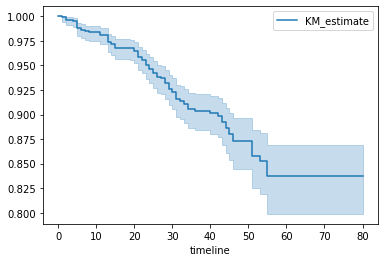

In [231]:
#a)Run a Kaplan-Meier analysis examining the relationship between t_CtPo_bi and 
#time to (t_ttop) new osteoporotic fractures (newosteofx) 

# Generating 1 KM curve for all: 
kmf = KaplanMeierFitter()
t = kmpvfx["t_ttop"]
y = kmpvfx["status"]
kmf.fit(t, event_observed=y)
kmf.plot()



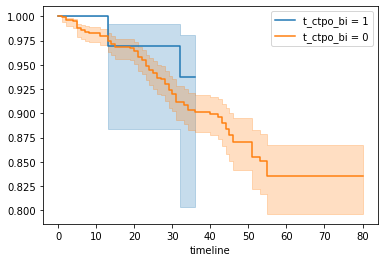

In [290]:
# Generating 2 KM curves for comparison: 
groups = kmpvfx["t_ctpo_bi"]
ix = (groups == 0)

kmf.fit(t[~ix], y[~ix], label='t_ctpo_bi = 1')
ax = kmf.plot_survival_function()

kmf.fit(t[ix], y[ix], label='t_ctpo_bi = 0')
ax = kmf.plot_survival_function(ax=ax) # on the same axes


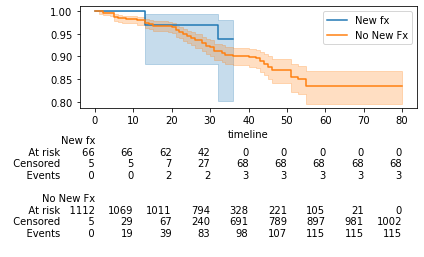

In [235]:
# Plot KM curve comparison with risk set below 
from lifelines.plotting import add_at_risk_counts

kmf_pvfx = KaplanMeierFitter()
kmf_pvfx.fit(t[~ix], y[~ix], label='New fx')
ax = kmf_pvfx.plot_survival_function(ci_show=True)

kmf_nopvfx = KaplanMeierFitter()
kmf_nopvfx.fit(t[ix], y[ix], label='No New Fx')
ax = kmf_nopvfx.plot_survival_function(ax=ax, ci_show=True) # on the same axes

add_at_risk_counts(kmf_pvfx, kmf_nopvfx, ax=ax)
plt.tight_layout()

#kmf.plot_survival_function(ci_show=True, at_risk_counts=True) # show_censors=True to display when censoring happened

In [237]:
# Log-rank test for curve comparison: 
pvfx_logrank = multivariate_logrank_test(kmpvfx['t_ttop'], kmpvfx['t_ctpo_bi'], kmpvfx['status'])
pvfx_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           1.26 0.26      1.93

In [284]:
print("surival estimate at 6 months is :", kmf.survival_function_.iloc[5, 0])
print("surival estimate at 12 months is :",kmf.survival_function_.iloc[11,0])
print("surival estimate at 18 months is :",kmf.survival_function_.iloc[17,0])

surival estimate at 6 months is : 0.9885764499121267
surival estimate at 12 months is : 0.9832348488800551
surival estimate at 18 months is : 0.9732738230912892


#b) Run a Kaplan-Meier analysis examining the relationship between t_TbSp_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx)

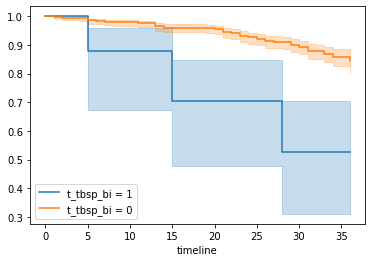

In [417]:
# Generating 2 KM curves for comparison: 
groups = kmpvfx["t_tbsp_bi"]
ix = (groups == 0)

kmf.fit(t[~ix], y[~ix], label='t_tbsp_bi = 1')
ax = kmf.plot_survival_function()

kmf.fit(t[ix], y[ix], label='t_tbsp_bi = 0')

ax = kmf.plot_survival_function(ax=ax) # on the same axes




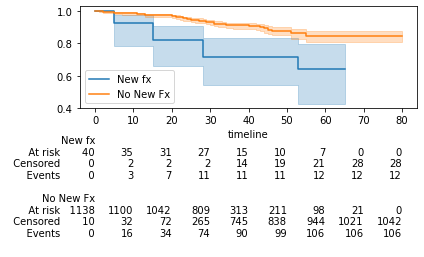

In [278]:
# Plot KM curve comparison with risk set below 
from lifelines.plotting import add_at_risk_counts

kmf_pvfx = KaplanMeierFitter()
kmf_pvfx.fit(t[~ix], y[~ix], label='New fx')
ax = kmf_pvfx.plot_survival_function(ci_show=True)

kmf_nopvfx = KaplanMeierFitter()
kmf_nopvfx.fit(t[ix], y[ix], label='No New Fx')
ax = kmf_nopvfx.plot_survival_function(ax=ax, ci_show=True) # on the same axes

add_at_risk_counts(kmf_pvfx, kmf_nopvfx, ax=ax)
plt.tight_layout()

#kmf.plot_survival_function(ci_show=True, at_risk_counts=True) # show_censors=True to display when censoring happened

In [280]:
# Log-rank test for curve comparison: 
pvfx_logrank = multivariate_logrank_test(kmpvfx['t_ttop'], kmpvfx['t_tbsp_bi'], kmpvfx['status'])
pvfx_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          16.44 <0.005     14.28

In [285]:
print("surival estimate at 6 months is :", kmf.survival_function_.iloc[5,0])
print("surival estimate at 12 months is :",kmf.survival_function_.iloc[11,0])
print("surival estimate at 18 months is :",kmf.survival_function_.iloc[17,0])

surival estimate at 6 months is : 0.9885764499121267
surival estimate at 12 months is : 0.9832348488800551
surival estimate at 18 months is : 0.9732738230912892


#2 A) What do you notice about the KM curve for individuals who have a t_CtPo_bi value of 1? 

(1 mark) 

This group has a longer time to event

In [319]:
#Confirm your suspicion by determining the mean value of time to event (t_ttop)
#for those with t_CtPo_bi = 1 vs 0. 
print("mean for time to event for  t_ctpo_bi = 0: ",data[data['t_ctpo_bi'] == 0]['t_ttop'].mean())
print("mean for time to event for t_ctpo_bi = 1: ",data[data['t_ctpo_bi'] == 1]['t_ttop'].mean())

mean for time to event for  t_ctpo_bi = 0:  36.76207513416816
mean for time to event for t_ctpo_bi = 1:  28.732394366197184


C) What do you notice? 

the mean time to event for t_ctpo_bi = 1 is actually shorter. i thought it was longer TTE, and then big steps down with each event. 

3.	Repeat #1 above but restricting the results to 36 months. 

<AxesSubplot:xlabel='timeline'>

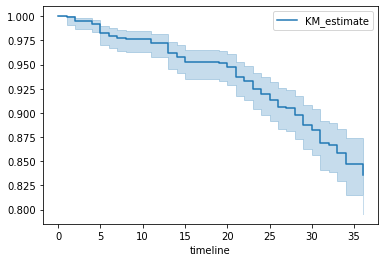

In [337]:
#Answer the same questions (i-iii)  in parts a and b of #1. (6 + 6 marks)
#restrict df to 36 months
df3 = kmpvfx[kmpvfx['t_ttop'] <= 36]

# Generating 1 KM curve for all: 
kmf = KaplanMeierFitter()
t = df3["t_ttop"]
y = df3["status"]
kmf.fit(t, event_observed=y)
kmf.plot()

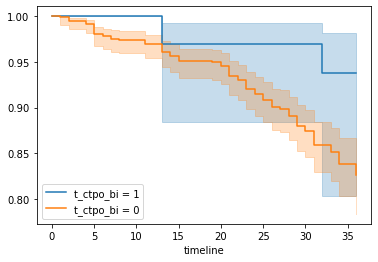

In [338]:
# Generating 2 KM curves for comparison:  
#t_ctpo_bi
groups = df3["t_ctpo_bi"]
ix = (groups == 0)

kmf.fit(t[~ix], y[~ix], label='t_ctpo_bi = 1')
ax = kmf.plot_survival_function()

kmf.fit(t[ix], y[ix], label='t_ctpo_bi = 0')
ax = kmf.plot_survival_function(ax=ax) # on the same axes

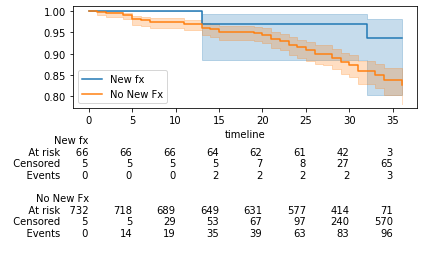

In [339]:
# Plot KM curve comparison with risk set below 
from lifelines.plotting import add_at_risk_counts

kmf_pvfx = KaplanMeierFitter()
kmf_pvfx.fit(t[~ix], y[~ix], label='New fx')
ax = kmf_pvfx.plot_survival_function(ci_show=True)

kmf_nopvfx = KaplanMeierFitter()
kmf_nopvfx.fit(t[ix], y[ix], label='No New Fx')
ax = kmf_nopvfx.plot_survival_function(ax=ax, ci_show=True) # on the same axes

add_at_risk_counts(kmf_pvfx, kmf_nopvfx, ax=ax)
plt.tight_layout()

In [340]:
# Log-rank test for curve comparison: 
pvfx_logrank = multivariate_logrank_test(df3['t_ttop'], df3['t_ctpo_bi'], df3['status'])
pvfx_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.45 0.03      4.84

In [341]:
print("surival estimate at 6 months is :", kmf.survival_function_.iloc[5,0])
print("surival estimate at 12 months is :",kmf.survival_function_.iloc[11,0])
print("surival estimate at 18 months is :",kmf.survival_function_.iloc[17,0])

surival estimate at 6 months is : 0.9781420765027327
surival estimate at 12 months is : 0.9697622765092819
surival estimate at 18 months is : 0.9495140855416684


#t_tbsp_bi

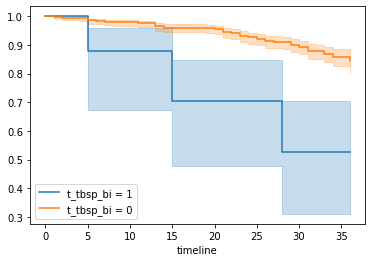

In [343]:
# Generating 2 KM curves for comparison:  
#t_ctpo_bi
groups = df3["t_tbsp_bi"]
ix = (groups == 0)

kmf.fit(t[~ix], y[~ix], label='t_tbsp_bi = 1')
ax = kmf.plot_survival_function()

kmf.fit(t[ix], y[ix], label='t_tbsp_bi = 0')
ax = kmf.plot_survival_function(ax=ax) # on the same axes

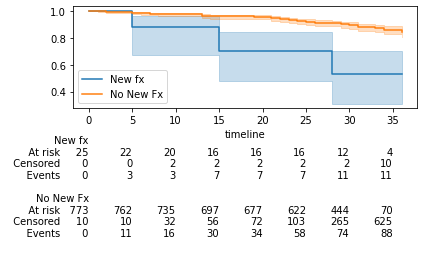

In [344]:
# Plot KM curve comparison with risk set below 
from lifelines.plotting import add_at_risk_counts

kmf_pvfx = KaplanMeierFitter()
kmf_pvfx.fit(t[~ix], y[~ix], label='New fx')
ax = kmf_pvfx.plot_survival_function(ci_show=True)

kmf_nopvfx = KaplanMeierFitter()
kmf_nopvfx.fit(t[ix], y[ix], label='No New Fx')
ax = kmf_nopvfx.plot_survival_function(ax=ax, ci_show=True) # on the same axes

add_at_risk_counts(kmf_pvfx, kmf_nopvfx, ax=ax)
plt.tight_layout()

In [345]:
# Log-rank test for curve comparison: 
pvfx_logrank = multivariate_logrank_test(df3['t_ttop'], df3['t_tbsp_bi'], df3['status'])
pvfx_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          27.53 <0.005     22.63

In [346]:
print("surival estimate at 6 months is :", kmf.survival_function_.iloc[5,0])
print("surival estimate at 12 months is :",kmf.survival_function_.iloc[11,0])
print("surival estimate at 18 months is :",kmf.survival_function_.iloc[17,0])

surival estimate at 6 months is : 0.9831824062095729
surival estimate at 12 months is : 0.9752683157921418
surival estimate at 18 months is : 0.9603844178979462


#part 2A COX HAZARDS

1.	How does a larger cortical porosity (t_CtPo_bi) and a larger trabecular separation  (t_TbSp_bi) relate to having new osteoporotic fractures (newosteofx) in the future, adjusting for age, height, weight and use of osteoporosis medication (osteomed)?

In [355]:
# drop na: 

# we will examine a binomial predictor: t_ctpo_bi

coxpvfx = xtrsurv[["t_ctpo_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_ctpo_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       1187
dtype: int64

In [356]:
#a.	Run a Cox PH model examining the relationship between t_CtPo_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 1187 total observations, 1069 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1187
number of events observed = 118
   partial log-likelihood = -783.43
         time fit was run = 2022-04-11 19:24:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_ctpo_bi  -0.79       0.45       0.59            -1.94             0.37                 0.14                 1.44
age         0.03       1.03       0.01             0.01             0.06                 1.01                 1.06
height      0.03       1.03       0.02             0.00             0.06                 1.00                 1.06
weight      0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
osteomed    0.24       1.27       0.20            -0.14             0.62                 0.87                 1.86

            cmp to     z    p   -log2(p)
covariate                               
t_ctpo_bi     0.00 -1.34 0.18       2.47
age           0.00  2.47 0.01       6.23
height        0.00  2.05 0.04       4.63
weight        0.00  0.06 0.95       0.07
osteomed      0.00  1.22 0.22       2.17
---
Concordance = 0.59
Partial AIC = 1576.85
log-likelihood ratio test = 13.19 on 5 df
-log2(p) of ll-ratio test = 5.53

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_CtPo_bi only
 
hazard r - .45 . ci .14 to 1.44

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 45 % the odds of having a fracture. it is not significant as p = 0.18

<AxesSubplot:xlabel='HR (95% CI)'>

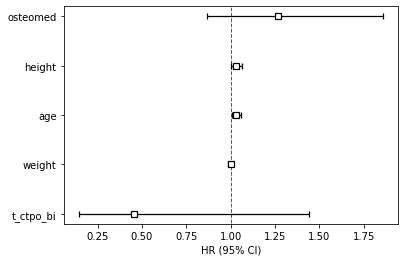

In [357]:
# View this in a figure 
# if the whiskers cross the dotted line, it is not significant 

cph.plot(hazard_ratios=True)

In [358]:
# we will examine a binomial predictor: t_tbsp_bi
# drop na: 

# we will examine a binomial predictor: t_ctpo_bi

coxpvfx = xtrsurv[["t_tbsp_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_tbsp_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       1187
dtype: int64

In [359]:
#a.	Run a Cox PH model examining the relationship between t_tbsp_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 1187 total observations, 1069 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1187
number of events observed = 118
   partial log-likelihood = -779.30
         time fit was run = 2022-04-11 19:25:49 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_tbsp_bi   1.16       3.20       0.31             0.55             1.77                 1.74                 5.90
age         0.03       1.03       0.01             0.00             0.05                 1.00                 1.05
height      0.03       1.03       0.01            -0.00             0.06                 1.00                 1.06
weight      0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
osteomed    0.28       1.32       0.20            -0.11             0.66                 0.90                 1.93

            cmp to    z      p   -log2(p)
covariate                                
t_tbsp_bi     0.00 3.74 <0.005      12.39
age           0.00 2.17   0.03       5.04
height        0.00 1.86   0.06       3.98
weight        0.00 0.52   0.60       0.73
osteomed      0.00 1.40   0.16       2.64
---
Concordance = 0.60
Partial AIC = 1568.60
log-likelihood ratio test = 21.45 on 5 df
-log2(p) of ll-ratio test = 10.55

<AxesSubplot:xlabel='HR (95% CI)'>

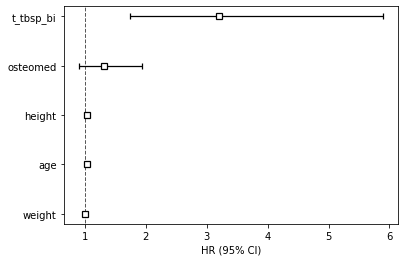

In [360]:
# View this in a figure 
# if the whiskers cross the dotted line, it is not significant 

cph.plot(hazard_ratios=True)

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_CtPo_bi only
 
hazard r - 3.20 . ci 1.74 to 5.90

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 3.20 % the odds of having a fracture. it is significant as p < 0.005

2.	Repeat question 1 above but looking only at times up to and including 36 months. (You could achieve this in many ways – subsetting the dataframe, using a conditional statement in the code, etc.) 

In [367]:
#Create time to event (TTE) and Status variables

# Make a copy of dataframe: 
xtrsurv2 =data.copy()

In [370]:
# Let's look at time from study visit to first new osteoporotic fracture

# study visit date is same as date when CT scan was done:  t_xtrdate
# new osteoporotic fracture date is split into:  'firstnewosteofx_year', 'firstnewosteofx_month', 'firstnewosteofx_day'
# study end date is nonewosteofx_enddate if they never had a fracture

xtrsurv2['visitdate'] = pd.to_datetime(xtrsurv['t_xtrdate'], errors='ignore')
xtrsurv2['enddate'] = pd.to_datetime(xtrsurv['nonewosteofx_enddate'], errors='coerce')

xtrsurv2['year'] = xtrsurv['firstnewosteofx_year'].replace(-9999.0, np.NaN)
xtrsurv2['month'] = xtrsurv['firstnewosteofx_month'].replace(-9999.0, np.NaN)
xtrsurv2['day'] = xtrsurv['firstnewosteofx_day'].replace(-9999.0, np.NaN)

xtrsurv2['newosteofxdate'] = pd.to_datetime(xtrsurv2[['year','month', 'day']], errors='ignore')
del xtrsurv2['year'], xtrsurv2['month'], xtrsurv2['day']


xtrsurv2['TTFx'] = round((xtrsurv2['newosteofxdate']-xtrsurv2['visitdate']).dt.days/30.30437,0)
xtrsurv2['TTEnd'] = round((xtrsurv2['enddate']-xtrsurv2['visitdate']).dt.days/30.30437,0)

xtrsurv.loc[xtrsurv2['newosteofx'] == 1, 'TTE'] = xtrsurv2['TTFx']
xtrsurv.loc[xtrsurv2['newosteofx'] == 0, 'TTE'] = xtrsurv2['TTEnd']

xtrsurv2['status'] = xtrsurv2['newosteofx']
xtrsurv2.head()

,replicate,t_xtrdate,r_xtrdate,nonewosteofx_enddate,nonewhipfx_enddate,qid,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,...,l14_16,neck_16,tothip_16,t_ctpo_bi,t_tbsp_bi,visitdate,enddate,newosteofxdate,TTFx,TTEnd
0,1.0,2012-02-29,2012-02-29,2015-02-08 00:00:00,2015-02-08 00:00:00,b'CA01508',5921.8,8.15,830.09093,116.72547,...,1.170590,0.831791,0.944238,0,0,2012-02-29,2015-02-08,NaT,NaN,35.0
1,1.0,2012-02-29,2012-02-29,2015-02-08 00:00:00,2015-02-08 00:00:00,b'CA01508',5921.8,8.15,830.09093,116.72547,...,1.170590,0.831791,0.944238,0,0,2012-02-29,2015-02-08,NaT,NaN,35.0
2,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.83,960.47070,72.70221,...,0.859351,0.778188,0.954228,0,0,2012-04-03,2014-03-11,NaT,NaN,23.0
3,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.83,960.47070,72.70221,...,0.859351,0.778188,0.954228,0,0,2012-04-03,2014-03-11,NaT,NaN,23.0
4,1.0,2012-03-13,2012-03-13,2015-01-27 00:00:00,2015-01-27 00:00:00,b'CA01545',6204.0,9.56,701.02992,99.59033,...,1.222938,0.851834,1.032604,0,0,2012-03-13,2015-01-27,NaT,NaN,35.0


In [374]:
#use df4 for dataframe up to 36 months
df4 = xtrsurv2[xtrsurv2['t_ttop'] <= 36]

# drop na: 

# we will examine a binomial predictor: t_ctpo_bi

coxpvfx = xtrsurv2[["t_ctpo_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_ctpo_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       1187
dtype: int64

In [375]:
#a.	Run a Cox PH model examining the relationship between t_CtPo_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 1187 total observations, 1069 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1187
number of events observed = 118
   partial log-likelihood = -783.43
         time fit was run = 2022-04-11 19:38:57 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_ctpo_bi  -0.79       0.45       0.59            -1.94             0.37                 0.14                 1.44
age         0.03       1.03       0.01             0.01             0.06                 1.01                 1.06
height      0.03       1.03       0.02             0.00             0.06                 1.00                 1.06
weight      0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
osteomed    0.24       1.27       0.20            -0.14             0.62                 0.87                 1.86

            cmp to     z    p   -log2(p)
covariate                               
t_ctpo_bi     0.00 -1.34 0.18       2.47
age           0.00  2.47 0.01       6.23
height        0.00  2.05 0.04       4.63
weight        0.00  0.06 0.95       0.07
osteomed      0.00  1.22 0.22       2.17
---
Concordance = 0.59
Partial AIC = 1576.85
log-likelihood ratio test = 13.19 on 5 df
-log2(p) of ll-ratio test = 5.53

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_CtPo_bi only
 
hazard r - 0.45 . ci .14 to 1.44

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 0.45 % the odds of having a fracture. it is not significant as p = .18

In [378]:
# we will examine a binomial predictor: t_tbsp_bi

coxpvfx = xtrsurv2[["t_tbsp_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_tbsp_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       1187
dtype: int64

In [379]:
#a.	Run a Cox PH model examining the relationship between t_CtPo_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 1187 total observations, 1069 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1187
number of events observed = 118
   partial log-likelihood = -779.30
         time fit was run = 2022-04-11 19:42:31 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_tbsp_bi   1.16       3.20       0.31             0.55             1.77                 1.74                 5.90
age         0.03       1.03       0.01             0.00             0.05                 1.00                 1.05
height      0.03       1.03       0.01            -0.00             0.06                 1.00                 1.06
weight      0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
osteomed    0.28       1.32       0.20            -0.11             0.66                 0.90                 1.93

            cmp to    z      p   -log2(p)
covariate                                
t_tbsp_bi     0.00 3.74 <0.005      12.39
age           0.00 2.17   0.03       5.04
height        0.00 1.86   0.06       3.98
weight        0.00 0.52   0.60       0.73
osteomed      0.00 1.40   0.16       2.64
---
Concordance = 0.60
Partial AIC = 1568.60
log-likelihood ratio test = 21.45 on 5 df
-log2(p) of ll-ratio test = 10.55

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_tbsp_bi only
 
hazard r - 3.20 . ci 1.74 to 5.90

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 3.20 % the odds of having a fracture. it is significant as p < 0.005

3.	a) Repeat question 1 above but looking only at times up to and including 36 months, AND also restricting to CT scans with motion grades 3 or below (t_moart <= 3).
Answer the same questions (i & ii)  in parts a and b of #1


In [385]:
#use df5 for dataframe up to 36 months, t_moart < = 3
df5 = xtrsurv2[xtrsurv2['t_ttop'] <= 36]
df5 = df5[df5['t_moart'] <= 3]

# drop na: 

# we will examine a binomial predictor: t_ctpo_bi

coxpvfx = df5[["t_ctpo_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_ctpo_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       790
dtype: int64

In [386]:
#a.	Run a Cox PH model examining the relationship between t_CtPo_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 790 total observations, 693 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 790
number of events observed = 97
   partial log-likelihood = -608.59
         time fit was run = 2022-04-11 19:51:33 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_ctpo_bi  -1.39       0.25       0.59            -2.54            -0.23                 0.08                 0.79
age         0.05       1.05       0.02             0.02             0.08                 1.02                 1.08
height      0.05       1.05       0.02             0.01             0.08                 1.01                 1.09
weight     -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
osteomed    0.31       1.36       0.21            -0.11             0.72                 0.90                 2.05

            cmp to     z      p   -log2(p)
covariate                                 
t_ctpo_bi     0.00 -2.35   0.02       5.75
age           0.00  2.99 <0.005       8.47
height        0.00  2.80   0.01       7.62
weight        0.00 -0.72   0.47       1.08
osteomed      0.00  1.44   0.15       2.75
---
Concordance = 0.62
Partial AIC = 1227.19
log-likelihood ratio test = 22.70 on 5 df
-log2(p) of ll-ratio test = 11.34

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_ctpo_bi only
 
hazard r - 0.25 . ci 0.08 to 0.79

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 0.25  the odds of having a fracture. it is significant as p  < 0.05 

In [388]:
# we will examine a binomial predictor: t_tbsp_bi

coxpvfx = df5[["t_tbsp_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_tbsp_bi  status  t_ttop  age    height  weight  osteomed
False      False   False   False  False   False   False       790
dtype: int64

In [390]:
#a.	Run a Cox PH model examining the relationship between t_tbsp_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 790 total observations, 693 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 790
number of events observed = 97
   partial log-likelihood = -606.51
         time fit was run = 2022-04-11 19:53:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_tbsp_bi   1.41       4.08       0.34             0.74             2.07                 2.10                 7.92
age         0.04       1.04       0.02             0.01             0.07                 1.01                 1.08
height      0.04       1.04       0.02             0.00             0.07                 1.00                 1.07
weight     -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
osteomed    0.23       1.26       0.22            -0.19             0.66                 0.82                 1.93

            cmp to     z      p   -log2(p)
covariate                                 
t_tbsp_bi     0.00  4.16 <0.005      14.92
age           0.00  2.48   0.01       6.24
height        0.00  2.12   0.03       4.87
weight        0.00 -0.05   0.96       0.06
osteomed      0.00  1.07   0.28       1.82
---
Concordance = 0.62
Partial AIC = 1223.02
log-likelihood ratio test = 26.86 on 5 df
-log2(p) of ll-ratio test = 14.01

 i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_ctpo_bi only
 
hazard r - 4.08 . ci 2.10 to 7.92

 ii.	Provide an interpretation of the HR including whether it is significant or not. 
 
t_ctpo_bi of 1 has 4.08 % the odds of having a fracture. it is significant as p < 0.005

What is the concordance statistic for each of these 2 last models (t_CtPo_bi vs t_TbSp_bi, restricting to 36 months and motion artifact <= 3)? Which model has a higher concordance statistic?

t_ctpo_bi -> 0.62

t_tbsp_bi -> 0.62

they are the same 

PART 2B – Cox Proportional Hazards (PH) Models – demonstrating independence (13 marks)
4.	a) Now include BOTH t_CtPo_bi and t_TbSp_bi into the same model, restricting to 36 months and motion artifact <= 3, and adjusting for the same covariates: age, height, weight, osteomed. 


In [392]:
# we will examine 2 binomial predictor: t_tbsp_bi and t_ctpo_bi

coxpvfx = df5[['t_ctpo_bi', "t_tbsp_bi", "status","t_ttop", 'age', "height", "weight", "osteomed"]].dropna()

np.isnan(coxpvfx).value_counts()

t_ctpo_bi  t_tbsp_bi  status  t_ttop  age    height  weight  osteomed
False      False      False   False   False  False   False   False       790
dtype: int64

In [393]:
#a.	Run a Cox PH model examining the relationship between t_tbsp_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 790 total observations, 693 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 790
number of events observed = 97
   partial log-likelihood = -602.98
         time fit was run = 2022-04-11 19:54:49 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_ctpo_bi  -1.28       0.28       0.59            -2.44            -0.12                 0.09                 0.88
t_tbsp_bi   1.31       3.69       0.34             0.64             1.97                 1.89                 7.19
age         0.05       1.05       0.02             0.01             0.08                 1.01                 1.08
height      0.04       1.04       0.02             0.01             0.07                 1.01                 1.08
weight     -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
osteomed    0.21       1.23       0.22            -0.21             0.64                 0.81                 1.89

            cmp to     z      p   -log2(p)
covariate                                 
t_ctpo_bi     0.00 -2.17   0.03       5.06
t_tbsp_bi     0.00  3.84 <0.005      12.97
age           0.00  2.86 <0.005       7.88
height        0.00  2.33   0.02       5.68
weight        0.00 -0.19   0.85       0.23
osteomed      0.00  0.97   0.33       1.60
---
Concordance = 0.65
Partial AIC = 1217.95
log-likelihood ratio test = 33.93 on 6 df
-log2(p) of ll-ratio test = 17.14

i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_CtPo_bi only

hr - 0.28               0.09         0.88

ii.	Provide an interpretation of the HR including whether it is significant or not. 

someone with t_ctpo_bi of 1 has 28 % the odds of having a fracture. it is significant as p < 0.05

iii.	Report the concordance statistic of the model 

0.65


#part 4 

Repeat the same model, further adjusting for the standard of care of DXA BMD of the total hip (tothip_16) 

In [397]:
# we will examine 2 binomial predictor: t_tbsp_bi and t_ctpo_bi

coxpvfx = df5[['t_ctpo_bi', "t_tbsp_bi", "status","t_ttop", 'age', "height", "weight", "osteomed",'tothip_16']].dropna()

np.isnan(coxpvfx).value_counts()

t_ctpo_bi  t_tbsp_bi  status  t_ttop  age    height  weight  osteomed  tothip_16
False      False      False   False   False  False   False   False     False        674
dtype: int64

In [398]:
#a.	Run a Cox PH model examining the relationship between t_tbsp_bi and
#time to (t_ttop) new osteoporotic fractures (newosteofx), adjusting for age, height, weight and osteomed
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model

cph = CoxPHFitter()
cph.fit(coxpvfx, 't_ttop', event_col='status') # automatically assumes all the other variables in the df are exposure/covariates
cph.print_summary() # tie method is by default Efron approximation 

<lifelines.CoxPHFitter: fitted with 674 total observations, 598 right-censored observations>
             duration col = 't_ttop'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 674
number of events observed = 76
   partial log-likelihood = -456.27
         time fit was run = 2022-04-11 19:58:57 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
t_ctpo_bi  -1.21       0.30       0.60            -2.37            -0.04                 0.09                 0.96
t_tbsp_bi   1.32       3.74       0.36             0.61             2.03                 1.84                 7.60
age         0.07       1.07       0.02             0.03             0.11                 1.03                 1.11
height      0.04       1.04       0.02             0.01             0.08                 1.01                 1.08
weight      0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
osteomed    0.06       1.06       0.25            -0.44             0.56                 0.64                 1.74
tothip_16  -1.99       0.14       1.19            -4.33             0.35                 0.01                 1.42

            cmp to     z      p   -log2(p)
covariate                                 
t_ctpo_bi     0.00 -2.02   0.04       4.54
t_tbsp_bi     0.00  3.64 <0.005      11.82
age           0.00  3.20 <0.005       9.49
height        0.00  2.29   0.02       5.51
weight        0.00  0.49   0.62       0.69
osteomed      0.00  0.22   0.82       0.28
tothip_16     0.00 -1.67   0.10       3.39
---
Concordance = 0.70
Partial AIC = 926.55
log-likelihood ratio test = 42.31 on 7 df
-log2(p) of ll-ratio test = 21.07

i.	Report hazard ratio (HR) and 95% confidence interval (CI) for t_CtPo_bi only

hr - 0.30               0.09         0.96

ii.	Provide an interpretation of the HR including whether it is significant or not. 

someone with t_ctpo_bi of 1 has 30 % the odds of having a fracture. it is significant as p < 0.05

iii.	Report the concordance statistic of the model 

0.70

5.	What do you conclude about which model is the best out of all of the ones examined in question 3 and 4 above? What is your interpretation? 

In [400]:
#The most previous model is the best as the concordance statistic is 0.70, indicating that 0.70 concordance between the predicted and the observed survicval


#defined as the fraction of all pairs of
#subjects whose predicted survival times are correctly ordered among all subjects that can actually be
#ordered. In other words, it is the probability of concordance between the predicted and the observed
#survival. 

The most previous model is the best as the concordance statistic is 0.70, indicating that 0.70 concordance between the predicted and the observed survival (fracture) rates

PART 3 – Cohort description – Table 1 (4 marks)
1.	Generate a Table 1 of your study cohort. Include all the variables used in your analyses. Report mean, SD, min and max for all continuous variables. For all binomial variables, provide frequency and %. 
(3 Marks)


In [404]:
coxpvfx.describe()

,t_ctpo_bi,t_tbsp_bi,status,t_ttop,age,height,weight,osteomed,tothip_16
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.100890,0.037092,0.112760,29.237389,73.734421,159.427300,70.553412,0.320475,0.841498
std,0.301407,0.189128,0.316534,7.677374,6.530471,6.410638,14.427962,0.467006,0.121831
min,0.000000,0.000000,0.000000,0.000000,60.000000,143.200000,39.500000,0.000000,0.405257
25%,0.000000,0.000000,0.000000,28.000000,68.000000,155.175000,60.000000,0.000000,0.750005
50%,0.000000,0.000000,0.000000,32.000000,74.000000,159.000000,68.450000,0.000000,0.846781
75%,0.000000,0.000000,0.000000,34.000000,79.000000,163.500000,77.500000,1.000000,0.920504
max,1.000000,1.000000,1.000000,36.000000,86.000000,180.000000,113.000000,1.000000,1.208164


In [407]:
coxpvfx['t_ctpo_bi'].value_counts()

0    606
1     68
Name: t_ctpo_bi, dtype: int64

In [408]:
coxpvfx['t_tbsp_bi'].value_counts()

0    649
1     25
Name: t_tbsp_bi, dtype: int64

2.	Tell me one thing you find interesting about this cohort.  

There number of subjects that have >= mean +2 SD is quite small compared to those below or both t_tbsp_bi and t_ctpo_bi